<a href="https://colab.research.google.com/github/visheshchandrakar/Finance-Projects/blob/main/Stock_Price_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Get 5 years of Apple stock data
stock = yf.download('AAPL', start='2020-01-01', end='2025-05-20')
stock.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


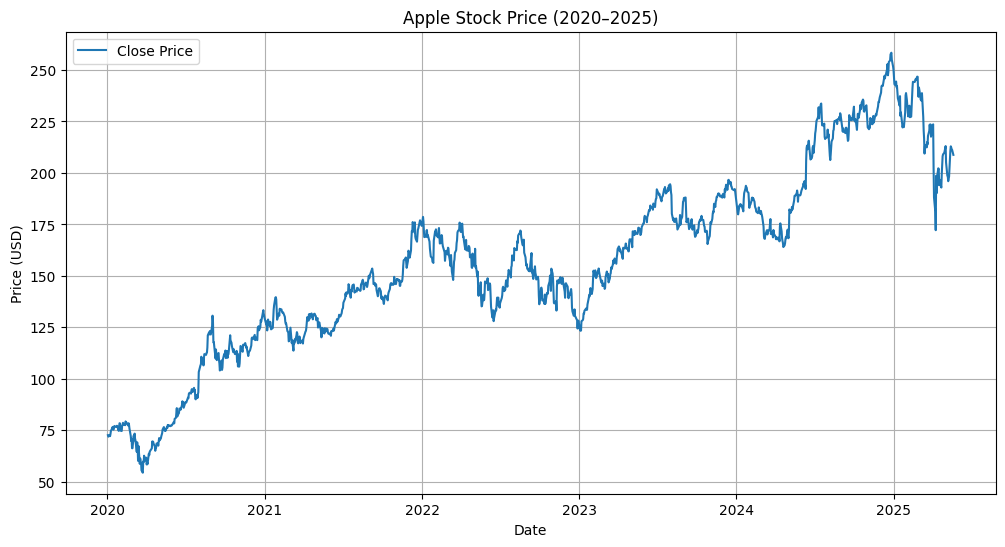

In [7]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], label='Close Price')
plt.title("Apple Stock Price (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


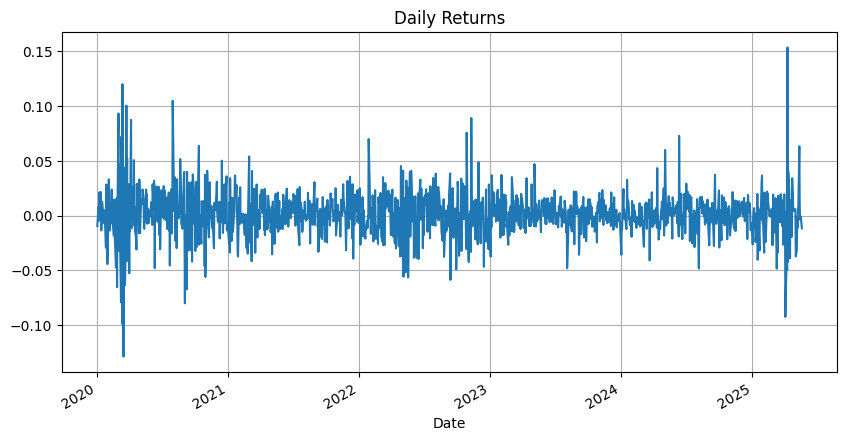

In [8]:
stock['Daily Return'] = stock['Close'].pct_change()
stock['Daily Return'].plot(figsize=(10,5), title='Daily Returns')
plt.grid(True)


In [9]:
# Standard deviation of daily returns (higher = riskier)
volatility = stock['Daily Return'].std()
print(f"Volatility (Risk): {volatility:.4f}")


Volatility (Risk): 0.0207


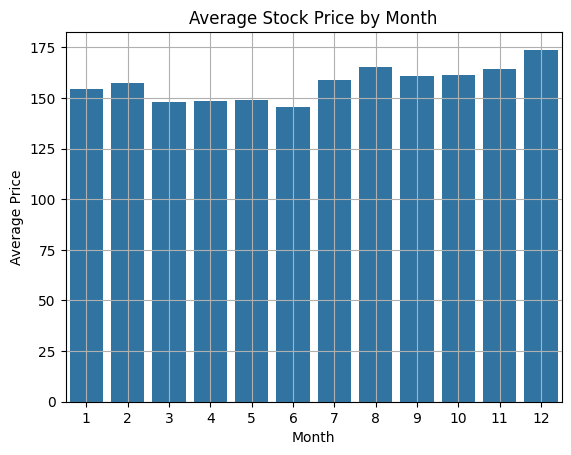

In [11]:
# stock['Month'] = stock.index.month # This line is already in the user's code
monthly_avg = stock.groupby('Month')['Close'].mean()

# Convert the Series to a DataFrame and reset the index
monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df.columns = ['Month', 'Average Price'] # Rename columns for clarity

# Use the DataFrame with seaborn.barplot
sns.barplot(x='Month', y='Average Price', data=monthly_avg_df)
plt.title("Average Stock Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()
